### 문제 설명

출발지점부터 distance만큼 떨어진 곳에 도착지점이 있습니다. 그리고 그사이에는 바위들이 놓여있습니다. 바위 중 몇 개를 제거하려고 합니다.
예를 들어, 도착지점이 25만큼 떨어져 있고, 바위가 [2, 14, 11, 21, 17] 지점에 놓여있을 때 바위 2개를 제거하면 출발지점, 도착지점, 바위 간의 거리가 아래와 같습니다.

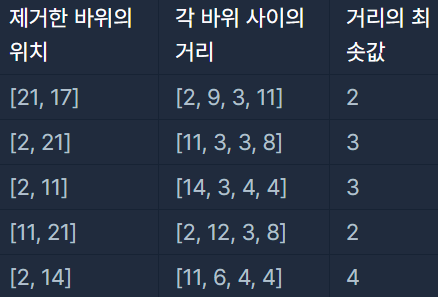

위에서 구한 거리의 최솟값 중에 가장 큰 값은 4입니다.

출발지점부터 도착지점까지의 거리 distance, 바위들이 있는 위치를 담은 배열 rocks, 제거할 바위의 수 n이 매개변수로 주어질 때, 바위를 n개 제거한 뒤 각 지점 사이의 거리의 최솟값 중에 가장 큰 값을 return 하도록 solution 함수를 작성해주세요.

### 문제 풀이

- 이분탐색을 활용해서 푼다.
- 왜냐하면 보통의 로직은 돌을 n개 만큼 제거해서 길이 리스트를 뽑아내지만, 시간 효율성이 떨어진다.
- 이분탐색을 활용해서, 0부터 distance의 범위를 줄여가면서 제거해야할 바위를 개수를 찾는다.

- mid = (left+right)//2 보다 거리가 짧으면 그 바위를 삭제하고 만약 크거나 같으면 살림.
- 바위를 너무 많이 삭제하면(n보다 크면), right를 줄인다. -> 범위를 줄임
- 바위가 너무 많이 남으면 (n보다 작으면), left를 올림 -> 범위를 올림

In [2]:
def solution(distance, rocks, n):
    answer = 0
    
    rocks.sort()  # 징검다리 정렬
    rocks.append(distance)  # 마지막 도착지와의 거리까지 계산하기 위해
    
    left, right = 0, distance  # 이분 탐색 스타트!
    while left <= right:
        # 나는 거리의 최솟값을 mid로 잡겠다!(거리가 mid 이하이면 다 없앤다!)
        mid = (left + right) // 2  
        min_distance = float('inf')  # 각 mid 에서 최솟값을 저장할 녀석
        current = 0  # 현재 위치
        remove_cnt = 0  # 바위를 제거한 개수
        
        # 거리 재기 스타트
        for rock in rocks:
            diff = rock - current  # 바위와 현재 위치 사이의 거리
            if diff < mid:  # mid 보다 거리가 짧으면 바위 제거
                remove_cnt += 1
            else:  # mid 보다 거리가 길거나 같으면 바위 그대로 두고
                current = rock  # 현재 위치를 그 바위로 옮기고
                min_distance = min(min_distance, diff)  # 해당 mid 단계에서의 최소거리인지 체크
        
        print(min_distance)
        
        # mid를 설정하는 단계
        if remove_cnt > n:  # 바위를 너무 많이 제거 했다. mid를 줄여서 바위를 조금만 제거하자
            right = mid - 1
        else:  # 바위를 너무 적게 제거했다 and 딱 맞다. mid를 늘려서 바위를 더 제거하거나 mid의 최댓값을 올려보자
            answer = min_distance
            left = mid + 1

    return answer


In [3]:
solution(25, [2, 14, 11, 21, 17], 2)

14
6
2
3
4


4